In [2]:
import pandas as pd
import numpy as np
import pickle as pkl

# data = pd.read_csv("./Data/nyc_taxi_data_2014.csv")
# data = data.loc[(data["pickup_longitude"] != float(0)) & (data["pickup_latitude"] != float(0)) \
#                 & (data["dropoff_longitude"] != float(0)) & (data["dropoff_latitude"] != float(0)) \
#                 & (data["trip_distance"] != float(0)) , :]\
# .sort_values(by=['pickup_datetime','dropoff_datetime']).reset_index(drop = True)
with open('./Data/nyc_taxi_data_2014.pkl', 'rb') as f:
    data = pkl.load(f)

In [3]:
data1 = data.loc[(data["pickup_datetime"].str.split('-').str[1] == "01"), :]
data2 = data.loc[(data["dropoff_datetime"].str.split('-').str[1] == "01"), :]
pickup = data1[["pickup_datetime", "pickup_longitude", "pickup_latitude", \
                "dropoff_longitude","dropoff_latitude", "trip_distance"]]


MemoryError: 

In [ ]:
pickup = pickup.loc[(pickup["pickup_longitude"] != float(0)) & (pickup["pickup_latitude"] != float(0)) \
                    & (pickup["dropoff_longitude"] != float(0)) & (pickup["dropoff_latitude"] != float(0))\
                    & (pickup["trip_distance"] != float(0)), :].sort_values(by=['pickup_datetime']).reset_index(drop = True)


In [ ]:
pickup['date'] = pickup['pickup_datetime'].str.split(' ').str[0]
pickup['time'] = pickup['pickup_datetime'].str.split(' ').str[1]
pickup['date'] = pickup['date'].str.split('-').str[2]
pickup['time'] = pickup['time'].str.split(':').str[0]
del pickup['pickup_datetime']
# dropoff = data2[["dropoff_datetime","dropoff_longitude", "dropoff_latitude"]]
# dropoff = dropoff.loc[(dropoff["dropoff_longitude"] != float(0)) & (dropoff["dropoff_latitude"] != float(0)) , :].sort_values(by=['dropoff_datetime']).reset_index(drop = True)
# dropoff['date'] = dropoff['dropoff_datetime'].str.split(' ').str[0]
# dropoff['time'] = dropoff['dropoff_datetime'].str.split(' ').str[1]
# dropoff['date'] = dropoff['date'].str.split('-').str[2]
# dropoff['time'] = dropoff['time'].str.split(':').str[0]
# del dropoff['dropoff_datetime']
with open('./Data/pickup.pkl', 'wb')as f:
    pkl.dump(pickup, f)
# with open('./dropoff.pkl', 'wb')as f:
#     pkl.dump(dropoff, f)
# 
# pickup = pd.read_pickle("./Data/pickup.pkl")
# # dropoff = pd.read_pickle("./dropoff.pkl")

# data

In [ ]:
import pickle

pickup = pd.read_pickle("./Data/pickup.pkl")
dropoff = pd.read_pickle("./Data/dropoff.pkl")

pclus = []
dclus = []
for i in (pickup['date'].unique()):
    for j in (pickup['time'].unique()):
        pclus.append(pickup.loc[(pickup["date"] == str(i)) & (pickup["time"] == str(j)), :])
        dclus.append(dropoff.loc[(dropoff["date"] == str(i)) & (dropoff["time"] == str(j)), :])

# for i in range(len(pclus)):
#     if len(pclus[i]) > len(dclus[i]):
#         print("pickup" + str(int(i/24)+1) + "일" + str(i%24) + "시 : " + str(len(pclus[i])) + "  " + "dropoff" + str(int(i/24)+1) + "일" + str(i%24) + "시 : " + str(len(dclus[i])) + " 0000 ")
#     else:
#         print("pickup" + str(int(i/24)+1) + "일" + str(i%24) + "시 : " + str(len(pclus[i])) + "  " + "dropoff" + str(int(i/24)+1) + "일" + str(i%24) + "시 : " + str(len(dclus[i])) +" 1111 ")

with open('./pclus.pkl', 'wb')as f:
    pkl.dump(pclus, f)
with open('./dclus.pkl', 'wb')as f:
    pkl.dump(dclus, f)
    

In [2]:
import pandas as pd
import numpy as np
import pickle as pkl

pickup = pd.read_pickle("./pickup.pkl")
dropoff = pd.read_pickle("./dropoff.pkl")
    
pclus = pd.read_pickle("./pclus.pkl")
dclus = pd.read_pickle("./dclus.pkl")
pclus[0]

FileNotFoundError: [Errno 2] No such file or directory: './pickup.pkl'

In [26]:
npclus=[]
nnp = []
for i in pclus:
    npclus.append(i.to_numpy())
    nnp.append(len(i))
ndclus=[]
nnd = []
for i in dclus:
    ndclus.append(i.to_numpy())
    nnd.append(len(i))

In [30]:
np.sort(nnp)

array([ 1153,  1255,  1351,  1493,  1872,  1949,  2103,  2143,  2151,
        2183,  2290,  2312,  2319,  2323,  2342,  2387,  2401,  2430,
        2450,  2516,  2571,  2572,  2577,  2607,  2617,  2672,  2733,
        2742,  2750,  2817,  2820,  2957,  2958,  2995,  3023,  3105,
        3111,  3136,  3142,  3146,  3153,  3187,  3188,  3280,  3312,
        3499,  3556,  3558,  3625,  3625,  3635,  3762,  3800,  3828,
        3898,  3904,  3909,  3967,  4009,  4030,  4088,  4097,  4099,
        4125,  4130,  4135,  4153,  4205,  4229,  4309,  4323,  4331,
        4337,  4377,  4400,  4404,  4433,  4433,  4434,  4436,  4452,
        4465,  4468,  4525,  4562,  4567,  4591,  4600,  4624,  4648,
        4660,  4675,  4759,  4777,  4806,  4818,  4822,  4858,  4861,
        4914,  4945,  4959,  4967,  4983,  5012,  5018,  5114,  5198,
        5216,  5219,  5275,  5279,  5326,  5548,  5552,  5587,  5755,
        5939,  5952,  5968,  5999,  6019,  6055,  6109,  6139,  6506,
        6679,  6736,

In [6]:
asd = pd.DataFrame(columns=['t','s','h'])

for i in range(len(pclus)):
    asd.loc[i,'t'] = str(int(i/24)+1) + "일" + str(i%24) + "시"
    #print(str(int(i/24)+1) + "일" + str(i%24) + "시 : " + str(len(pclus[i])))
    asd.loc[i,'s'] = int(len(pclus[i]))
    #print(str(int(i/24)+1) + "일" + str(i%24) + "시 : " + str(len(dclus[i])))
    asd.loc[i,'h'] = int(len(dclus[i])) 

# asd.loc[(asd["h"] < 1000) & (asd["s"] < 1000) , :]


In [36]:
sdf = asd[asd.columns[1:]].astype('int')
sdf['h'].min()
#asd.loc[(asd["h"] < 1000) & (asd["d"] < 1000) , :]

1116

In [10]:
pp=pclus[0].sample(frac=0.05, random_state=0).to_numpy()
dd=dclus[0].sample(frac=0.05, random_state=0).to_numpy()
print(pp)
print(dd)

[[-73.998227 40.745667 4.68 '01' '00']
 [-73.956362 40.767007 4.23 '01' '00']
 [-73.97745999999998 40.726647 3.31 '01' '00']
 ...
 [-74.007665 40.743167 3.12 '01' '00']
 [-73.97481999999998 40.790197 6.96 '01' '00']
 [-73.980777 40.75066 0.12 '01' '00']]
[[-73.994128 40.753557 '01' '00']
 [-73.933197 40.845087 '01' '00']
 [-73.96835699999998 40.768895 '01' '00']
 ...
 [-74.00829899999998 40.71664 '01' '00']
 [-73.982505 40.748937 '01' '00']
 [-74.009575 40.710232 '01' '00']]


In [1]:
dclus_=[]
for i in range(7*24):
    dclus_.append(dclus[i+120].sample(frac=0.05, random_state=0))
dclus_

NameError: name 'dclus' is not defined

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import time
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':0}
plt.rcParams["figure.figsize"] = [9,7]
"""!pip install hdbscan"""
import hdbscan
# for i in range(168):
#     print(1)
# data9 = pd.read_csv("./Data/location/uber-raw-data-sep14.csv")
i=0


In [13]:
data = pclus[0][["dropoff_longitude","dropoff_latitude"]]
test_data = data.to_numpy()
db = DBSCAN(eps=0.2, min_samples=10).fit(test_data)
palette = sns.color_palette()
cluster_colors = [palette[col]
                  if col >= 0 else (0.5, 0.5, 0.5) for col in
                  db.labels_]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
#     print(plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds))
#     time.sleep(5)
print(i, dclus_[i].shape)
i=i+1

KeyError: "None of [Index(['dropoff_longitude', 'dropoff_latitude'], dtype='object')] are in the [columns]"

In [ ]:
dclus_[i-1].drop(dclus_[i-1][dclus_[i-1]["dropoff_longitude"].isin([dclus_[i-1]["dropoff_longitude"].min()])].index,inplace=True)

In [ ]:
dclus_[i-1].drop(dclus_[i-1][dclus_[i-1]["dropoff_longitude"].isin([dclus_[i-1]["dropoff_longitude"].max()])].index,inplace=True)

In [ ]:
dclus_[i-1].drop(dclus_[i-1][dclus_[i-1]["dropoff_latitude"].isin([dclus_[i-1]["dropoff_latitude"].max()])].index,inplace=True)

In [ ]:
dclus_[i-1].drop(dclus_[i-1][dclus_[i-1]["dropoff_latitude"].isin([dclus_[i-1]["dropoff_latitude"].min()])].index,inplace=True)

In [ ]:
data = dclus_[0][["dropoff_longitude","dropoff_latitude"]]
test_data = data.to_numpy()
db = DBSCAN(eps=0.01, min_samples=7).fit(test_data)
palette = sns.color_palette("Set3", 14)
cluster_colors = [palette[col]
                  if col >= 0 else (0.5, 0.5, 0.5) for col in
                  db.labels_]
print("Max label : ", db.labels_.max())

for i in np.unique(db.labels_):
    print(i, "Label count : " ,db.labels_[db.labels_ == i].size)
print(test_data.shape)
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)



Max label :  5
[-1  0  1  2  3  4  5]
      from    to  distance
0      528   579  0.000594
1     1139   207  0.000854
2      875   187  0.000904
3      541   528  0.000911
4      679   579  0.000948
...    ...   ...       ...
1148  1039   578  0.078171
1149   508   667  0.080883
1150   424   508  0.092547
1151   892  1039  0.096061
1152   290   688  0.118691

[1153 rows x 3 columns]


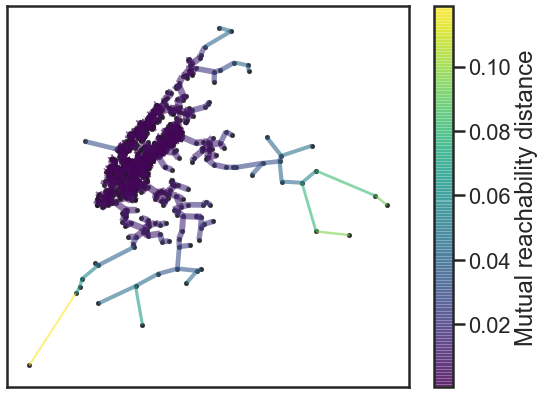

In [26]:
#HBSCAN
test_data = pp[:, :2]
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, gen_min_span_tree=True, prediction_data =True)
clusterer.fit(test_data)
print("Max label : ", clusterer.labels_.max())
print(np.unique(clusterer.labels_))

clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=10,
                                      edge_linewidth=2)
print(clusterer.minimum_spanning_tree_.to_pandas( ))

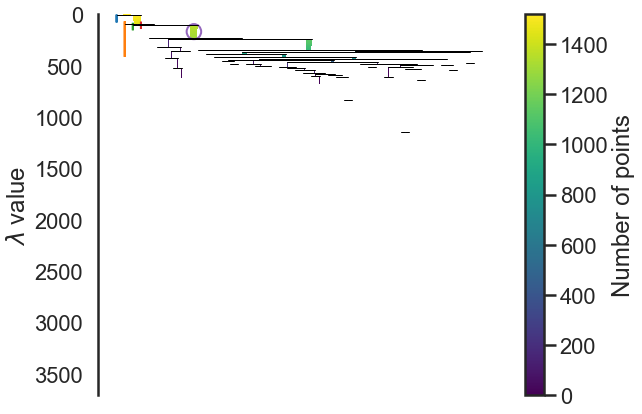

In [19]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

-1 Label count :  105
0 Label count :  19
1 Label count :  10
2 Label count :  14
3 Label count :  8
4 Label count :  15
5 Label count :  983
(1154, 4)
[[5]
 [2]
 [5]
 ...
 [5]
 [5]
 [5]]


array([[-73.994128, 40.753557, '01', '00', 5],
       [-73.933197, 40.845087, '01', '00', 2],
       [-73.96835699999998, 40.768895, '01', '00', 5],
       ...,
       [-74.00829899999998, 40.71664, '01', '00', 5],
       [-73.982505, 40.748937, '01', '00', 5],
       [-74.009575, 40.710232, '01', '00', 5]], dtype=object)

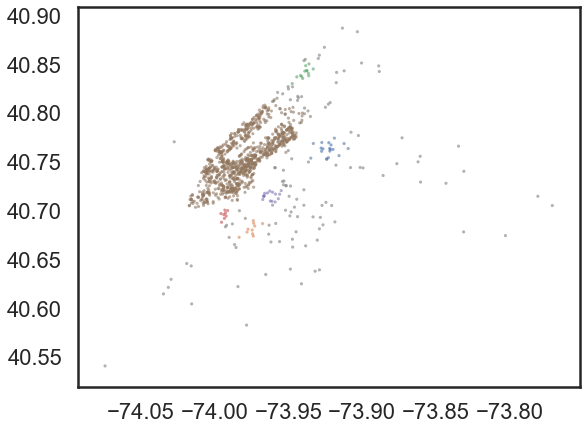

In [44]:
# palette = sns.color_palette("Set3", 12)
# cluster_colors = [sns.desaturate(palette[col], sat)
#                   if col >= 0 else (0.3,0.3,0.3) for col, sat in
#                   zip(clusterer.labels_, clusterer.probabilities_)]
# plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*test_data.T, s=10, linewidth=0, c=cluster_member_colors, alpha=0.6)

for i in np.unique(clusterer.labels_):
    print(i, "Label count : " ,clusterer.labels_[clusterer.labels_ == i].size)

print(pp.shape)
cc = clusterer.labels_.reshape(-1, 1)
print(cc)
a2 = np.concatenate((pp, cc), axis = 1)
a2

In [ ]:
import numpy as np
import pandas as pd


import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g = clusterer.minimum_spanning_tree_.to_networkx( )
g.nodes()

In [ ]:
a = clusterer.minimum_spanning_tree_.to_pandas( )

In [ ]:
# data9["label"] = clusterer.labels_
# data9["probability"] = clusterer.probabilities_
# data9
df1 = pd.DataFrame(clusterer.labels_ , columns = ["labels"])
df1["probabilities"] = clusterer.probabilities_
df1.loc[(df1["labels"]==5) &(df1["probabilities"] < 1)]

In [36]:
# 두 좌표간의 거리 구하기
import numbers
import math
import numpy as np


class GeoUtil:
    @staticmethod
    def d2r(degree):
        return degree *(math.pi/180)
    
    @staticmethod
    def harversion(X1, X2):
        if X1.ndim == 1:
            X1 = X1.reshape(-1, 1)
        R = 6371 #지구반경(km)
        print(X1[:,0], X2[0])
        print(X1[:,1], X2[1])
        dLon = GeoUtil.d2r(X1[:, 0]-X2[0])
        dLat = GeoUtil.d2r(X1[:, 1]-X2[1])
        print(dLon, dLat)
        a = math.sin(dLat/2) * math.sin(dLat/2) + (math.cos(GeoUtil.d2r(X2[0])) \
                * math.cos(GeoUtil.d2r(X2[1])) * math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return R * b
    
    @staticmethod
    def euclidean(X1, X2):
        matrix = 0
        for i in range(X1.shape[1]):
            matrix += (X1[:, i] - X2[i])**2
        matrix = matrix**0.5
        return matrix
    
GeoUtil.harversion(np.array([[126.97843, 37.56668],[126.97853, 37.56678]]) \
                   , np.array([127.02758 , 37.49794]) )

[126.97843 126.97853] 127.02758
[37.56668 37.56678] 37.49794
[-0.00085783 -0.00085608] [0.00119974 0.00120148]


TypeError: only size-1 arrays can be converted to Python scalars

In [32]:
import numpy as np
# GeoUtil.euclidean(np.array([[-73.995960,40.738927],
#                            [-73.915960,40.758927]]),\
#                   np.array([-73.993230,40.762842]))
# GeoUtil.harversion(np.array([[-73.995960,40.738927],
#                            [-73.915960,40.758927]]),\
#                   np.array([-73.993230,40.762842]))


[126.97843 126.97853] 127.02758
[37.56668 37.56668] 37.49794


TypeError: only size-1 arrays can be converted to Python scalars

In [83]:
x1 = np.array([[126.97843, 37.56668], [126.97853, 37.56678]])
y1 = np.array([[127.02758 , 37.49794],[127.02858 , 37.49894],[127.02958 , 37.49994]])
x2 = np.array([[126.97843],[126.97853]])
y2 = np.array([127.02758])

def Calculate_distance(X1, X2):
        return ((X1 - X2)**2).sum(1)**0.5
    
print(Calculate_distance(x1, y1[0]))
print(Calculate_distance(x2, y2))
print(x1.shape[0])
mat = np.zeros([x1.shape[0],y1.shape[0]])
print(mat1)
for idx, i in enumerate(x1):
    mat[idx] = Calculate_distance(i, y1)
mat

[0.08450391 0.0845272 ]
[0.04915 0.04905]
2
[[0. 0. 0.]
 [0. 0. 0.]]


array([[0.08450391, 0.08428363, 0.08408656],
       [0.0845272 , 0.08430461, 0.08410522]])